<a href="https://colab.research.google.com/github/Cassia-s/PROJETO-4-DataLab/blob/main/Projeto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🎯 Objetivo do projeto

Analisamos os preços históricos de ações de grandes empresas de tecnologia (Big Techs) como Apple, Tesla, Microsoft e Google. O objetivo foi descobrir quais empresas apresentam variações de preço mais estáveis ou mais voláteis, para ajudar investidores a tomar decisões mais seguras ou mais ousadas, de acordo com seu perfil.

##✅ Importar da Bibliotecas

In [1]:
import pandas as pd

# Carregar os datasets
df_stocks = pd.read_excel('/content/big_tech_stock_prices.xlsx')
df_companies = pd.read_csv('/content/big_tech_companies.csv')

##✅ Importar os arquivos

In [2]:
# Importar bibliotecas
import pandas as pd

# Ler o CSV (informações das empresas)
df_companies = pd.read_csv('big_tech_companies.csv')

# Ler o Excel (preços das ações)
df_prices = pd.read_excel('big_tech_stock_prices.xlsx')

# Visualizar as 5 primeiras linhas de cada base
print("📄 Empresas:")
display(df_companies.head())

print("📈 Preços das Ações:")
display(df_prices.head())



📄 Empresas:


,stock_symbol,company
0,AAPL,Apple Inc.
1,ADBE,Adobe Inc.
2,AMZN,"Amazon.com, Inc."
3,CRM,"Salesforce, Inc."
4,CSCO,"Cisco Systems, Inc."


📈 Preços das Ações:


,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0


##✅ Ver estrutura e tipos de dados

In [3]:
# Ver tipos de dados
print("Tipos de dados - Companies:")
print(df_companies.dtypes)

print("\nTipos de dados - Prices:")
print(df_prices.dtypes)

# Resumo estatístico das variáveis numéricas
df_prices.describe()


Tipos de dados - Companies:
stock_symbol    object
company         object
dtype: object

Tipos de dados - Prices:
stock_symbol            object
date            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
adj_close              float64
volume                 float64
dtype: object


,date,open,high,low,close,adj_close,volume
count,45089,45089.000000,45089.000000,45089.000000,45089.000000,45089.000000,4.508900e+04
mean,2016-08-03 16:49:50.565326336,89.267274,90.370562,88.112582,89.272028,85.210443,5.298188e+07
min,2010-01-04 00:00:00,1.076000,1.108667,0.998667,1.053333,1.053333,5.892000e+05
25%,2013-05-30 00:00:00,25.670000,25.930180,25.360001,25.660000,22.077059,9.629500e+06
50%,2016-08-09 00:00:00,47.930000,48.459999,47.470001,47.970001,45.378979,2.646420e+07
75%,2019-10-22 00:00:00,128.660004,129.847031,127.250000,128.639999,113.679848,5.840030e+07
max,2023-01-24 00:00:00,696.280029,700.989990,686.090027,691.690002,691.690002,1.880998e+09
std,NaN,101.625934,103.000049,100.123385,101.591905,100.994995,9.324966e+07


##✅ Tratar valores nulos

In [4]:
# Exibir as linhas do df_prices que contêm ao menos 1 valor nulo
df_prices[df_prices.isnull().any(axis=1)]

# Exibir índices + linhas com nulos
nulos_prices = df_prices[df_prices.isnull().any(axis=1)]
print(f"Total de linhas com nulos: {nulos_prices.shape[0]}")
print("Índices das linhas com nulos:")
print(nulos_prices.index.tolist())
nulos_prices

df_companies[df_companies.isnull().any(axis=1)]

print("Valores nulos - Prices:")
print(df_prices.isnull().sum())

print("\nValores nulos - Companies:")
print(df_companies.isnull().sum())

Total de linhas com nulos: 1
Índices das linhas com nulos:
[45089]
Valores nulos - Prices:
stock_symbol    0
date            1
open            1
high            1
low             1
close           1
adj_close       1
volume          1
dtype: int64

Valores nulos - Companies:
stock_symbol    0
company         0
dtype: int64


##✅ Excluir valores nulos

In [5]:
# Remover linha com qualquer valor nulo
df_prices = df_prices.dropna()

# Verificar novamente se há nulos
print("Valores nulos após remoção:")
print(df_prices.isnull().sum())

# Verificar o resultado
print(f"Número de registros após remoção do nulo: {df_prices.shape[0]}")

Valores nulos após remoção:
stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64
Número de registros após remoção do nulo: 45089


##✅ Valores duplicados

In [6]:
# Verificar duplicatas completas (linhas repetidas)
duplicatas = df_prices.duplicated()
print(f"Número total de linhas duplicadas: {duplicatas.sum()}")

# Filtrar e mostrar todas as linhas duplicadas completas
duplicatas_completas = df_prices[df_prices.duplicated(keep=False)]

# Exibir as duplicatas
duplicatas_completas



Número total de linhas duplicadas: 1


,stock_symbol,date,open,high,low,close,adj_close,volume
45087,TSLA,2022-12-29,120.389999,123.57,117.5,121.82,121.82,221923300.0
45088,TSLA,2022-12-29,120.389999,123.57,117.5,121.82,121.82,221923300.0


##✅ Remover duplicatas com base em colunas-chave

In [7]:
# Remove todas as duplicatas completas, mantendo apenas a primeira ocorrência
df_prices = df_prices.drop_duplicates(keep='first')

# Verificar o resultado
print(f"Número de registros após remoção de duplicatas: {df_prices.shape[0]}")

print(f"Duplicatas restantes: {df_prices.duplicated().sum()}")

Número de registros após remoção de duplicatas: 45088
Duplicatas restantes: 0


##✅ Verificação

In [8]:
# Verificar valores nulos
nulos_data = df_prices['date'].isnull().sum()
print(f"Número de datas nulas: {nulos_data}")

# Período total coberto pelos dados
data_minima = df_prices['date'].min()
data_maxima = df_prices['date'].max()

print(f"Menor data registrada: {data_minima}")
print(f"Maior data registrada: {data_maxima}")

import datetime

datas_futuras = df_prices[df_prices['date'] > pd.Timestamp(datetime.datetime.today())]
print(f"Registros com datas no futuro: {datas_futuras.shape[0]}")

# Verificar duplicações por empresa + data
duplicatas_data_empresa = df_prices[df_prices.duplicated(subset=['stock_symbol', 'date'], keep=False)]
print(f"Número de datas duplicadas por empresa: {duplicatas_data_empresa.shape[0]}")


Número de datas nulas: 0
Menor data registrada: 2010-01-04 00:00:00
Maior data registrada: 2023-01-24 00:00:00
Registros com datas no futuro: 0
Número de datas duplicadas por empresa: 0


##✅ Verificar valores fora do escopo numérico

In [9]:
# Verificar se há preços menores ou iguais a 0
fora_escopo = df_prices[
    (df_prices['open'] <= 0) |
    (df_prices['high'] <= 0) |
    (df_prices['low'] <= 0) |
    (df_prices['close'] <= 0) |
    (df_prices['adj_close'] <= 0)
]

print(f"Número de registros com valores inválidos de preço: {fora_escopo.shape[0]}")


Número de registros com valores inválidos de preço: 0


##✅ Verificar categorias inválidas (stock_symbol)

In [10]:
volume_invalido = df_prices[df_prices['volume'] <= 0]
print(f"Número de registros com volume <= 0: {volume_invalido.shape[0]}")


Número de registros com volume <= 0: 0


##✅ Listar categorias únicas e verificar inconsistências

In [11]:
# Ver categorias únicas
print("Símbolos únicos encontrados:")
print(sorted(df_prices['stock_symbol'].unique()))


Símbolos únicos encontrados:
['AAPL', 'ADBE', 'AMZN', 'CRM', 'CSCO', 'GOOGL', 'IBM', 'INTC', 'META', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'TSLA']


##✅ Junção das bases pela chave

In [12]:
# Junção pela chave 'stock_symbol'
df_merged = pd.merge(df_prices, df_companies, on='stock_symbol', how='left')

# Exibir primeiras linhas da base resultante
df_merged.head()

,stock_symbol,date,open,high,low,close,adj_close,volume,company
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0,Apple Inc.
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0,Apple Inc.
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0,Apple Inc.
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0,Apple Inc.
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0,Apple Inc.


##✅ Verificação

In [13]:
# Verificar valores nulos após a junção
print("Valores nulos por coluna após o merge:")
print(df_merged.isnull().sum())


Valores nulos por coluna após o merge:
stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
company         0
dtype: int64


##✅ Verificação DataFrame

In [14]:
# Informações gerais sobre o DataFrame
df_merged.info()

# Número de valores únicos por coluna
print(df_merged.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45088 non-null  object        
 1   date          45088 non-null  datetime64[ns]
 2   open          45088 non-null  float64       
 3   high          45088 non-null  float64       
 4   low           45088 non-null  float64       
 5   close         45088 non-null  float64       
 6   adj_close     45088 non-null  float64       
 7   volume        45088 non-null  float64       
 8   company       45088 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 3.1+ MB
stock_symbol       14
date             3287
open            29798
high            30056
low             30028
close           30965
adj_close       41279
volume          43550
company            14
dtype: int64


##✅ Listar colunas numéricas para análise

In [15]:
# Selecionar colunas numéricas
colunas_numericas = df_merged.select_dtypes(include='number').columns.tolist()
print("Colunas numéricas:", colunas_numericas)


Colunas numéricas: ['open', 'high', 'low', 'close', 'adj_close', 'volume']


##✅ Detectar e contar outliers com IQR

In [16]:
# Função para contar outliers por coluna usando IQR
def detectar_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    return outliers

# Detectar outliers por coluna
for col in colunas_numericas:
    outliers = detectar_outliers_iqr(df_merged, col)
    print(f"{col}: {len(outliers)} outliers encontrados")


open: 2553 outliers encontrados
high: 2594 outliers encontrados
low: 2514 outliers encontrados
close: 2555 outliers encontrados
adj_close: 3333 outliers encontrados
volume: 3462 outliers encontrados


##✅ Código para criar boxplots por empresa

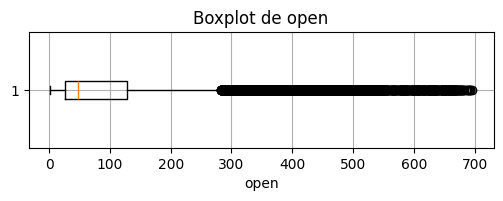

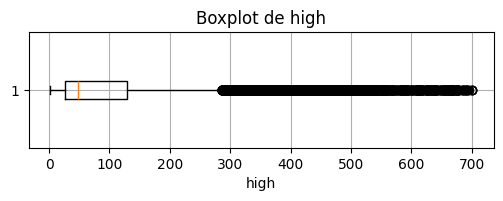

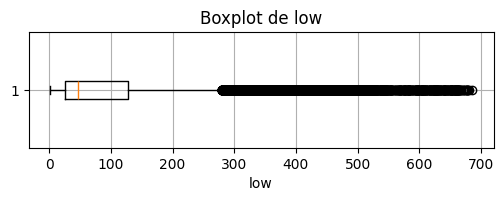

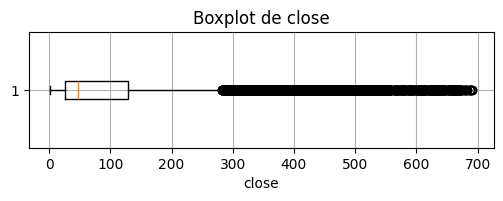

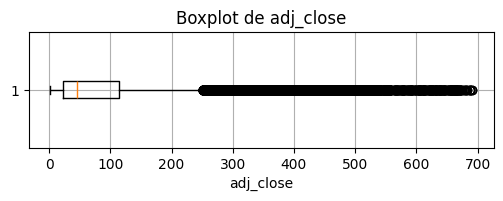

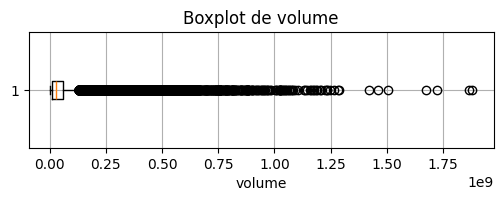

Resumo de colunas com outliers detectados:

Coluna: open
            open
5615  286.459991
5616  286.100006
5617  291.000000
5645  283.910004
5651  287.000000

Coluna: high
            high
5615  291.709991
5616  289.769989
5617  291.000000
5619  286.350006
5628  285.869995

Coluna: low
             low
5615  285.380005
5616  285.250000
5617  283.190002
5619  282.390015
5644  280.200012

Coluna: close
           close
5615  286.140015
5616  289.250000
5617  283.350006
5619  285.579987
5620  283.660004

Coluna: adj_close
       adj_close
5388  251.309998
5389  253.339996
5390  252.699997
5391  253.949997
5393  251.210007

Coluna: volume
        volume
0  493729600.0
1  601904800.0
2  552160000.0
3  477131200.0
4  447610800.0


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecionar apenas colunas numéricas
numeric_cols = df_merged.select_dtypes(include='number').columns

# Dicionário para armazenar os outliers
outliers_iqr = {}

for col in numeric_cols:
    Q1 = df_merged[col].quantile(0.25)
    Q3 = df_merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = df_merged[(df_merged[col] < lim_inf) | (df_merged[col] > lim_sup)]

    if not outliers.empty:
        outliers_iqr[col] = outliers[[col]]

    # Boxplot para visualização
    plt.figure(figsize=(6, 1.5))
    plt.boxplot(df_merged[col].dropna(), vert=False)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

# Exibir resumo
print("Resumo de colunas com outliers detectados:")
for col, out_df in outliers_iqr.items():
    print(f"\nColuna: {col}")
    print(out_df.head())

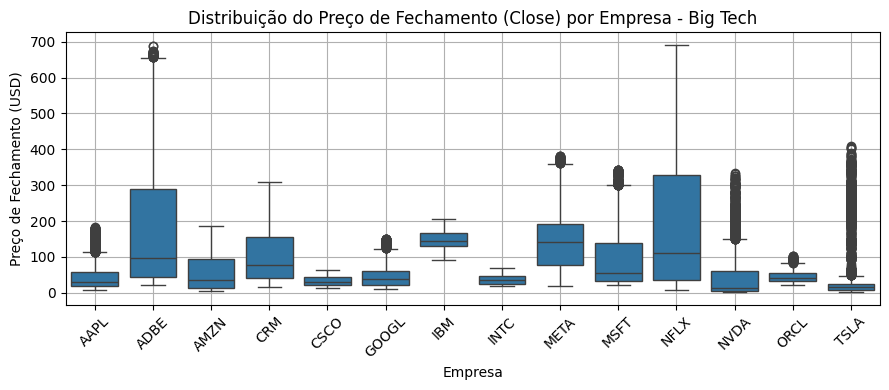

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar o tamanho do gráfico
plt.figure(figsize=(9, 4))

# Boxplot do preço de fechamento por empresa
sns.boxplot(data=df_merged, x='stock_symbol', y='close')

# Títulos e labels
plt.title('Distribuição do Preço de Fechamento (Close) por Empresa - Big Tech')
plt.xlabel('Empresa')
plt.ylabel('Preço de Fechamento (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import pandas as pd

# Selecionar colunas numéricas
numeric_cols = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
outliers_info = {}

for col in numeric_cols:
    Q1 = df_merged[col].quantile(0.25)
    Q3 = df_merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Selecionar outliers com data e código da ação
    outliers = df_merged[(df_merged[col] < lim_inf) | (df_merged[col] > lim_sup)][['date', 'stock_symbol', col]]

    if not outliers.empty:
        outliers_info[col] = outliers

# Exibir resultado
for col, out_df in outliers_info.items():
    print(f"\nOutliers na coluna: {col}")
    print(out_df.sort_values(by='date').head(10))  # Mostra os 10 primeiros por data


Outliers na coluna: open
            date stock_symbol        open
34175 2018-02-22         NFLX  283.880005
34177 2018-02-26         NFLX  288.750000
34178 2018-02-27         NFLX  294.769989
34179 2018-02-28         NFLX  293.100006
34180 2018-03-01         NFLX  292.750000
34181 2018-03-02         NFLX  284.649994
34182 2018-03-05         NFLX  302.850006
34183 2018-03-06         NFLX  319.880005
34184 2018-03-07         NFLX  320.000000
34185 2018-03-08         NFLX  322.200012

Outliers na coluna: high
            date stock_symbol        high
34158 2018-01-29         NFLX  286.809998
34173 2018-02-20         NFLX  285.809998
34174 2018-02-21         NFLX  286.640015
34176 2018-02-23         NFLX  286.000000
34177 2018-02-26         NFLX  295.649994
34178 2018-02-27         NFLX  297.359985
34179 2018-02-28         NFLX  295.750000
34180 2018-03-01         NFLX  295.250000
34181 2018-03-02         NFLX  301.179993
34182 2018-03-05         NFLX  316.910004

Outliers na coluna: low

##✅ Calcular a variação diária (diferença entre high e low)

In [20]:
# Calcular a variação diária (diferença entre high e low)
df_merged['variacao_media'] = df_merged['high'] - df_merged['low']

# Calcular a variação média por empresa
variacao_media_por_empresa = df_merged.groupby('company')['variacao_media'].mean().reset_index()

# Encontrar as empresas com menor variação média
from tabulate import tabulate
empresas_com_menor_variacao = variacao_media_por_empresa.nsmallest(14, 'variacao_media')

print("Ordem de Empresas com menor variação média entre o preço mais alto e baixo no período de 13 anos:")
print(tabulate(empresas_com_menor_variacao, headers='keys', tablefmt='pretty'))

Ordem de Empresas com menor variação média entre o preço mais alto e baixo no período de 13 anos:
+----+---------------------------------------------+--------------------+
|    |                   company                   |   variacao_media   |
+----+---------------------------------------------+--------------------+
| 4  |             Cisco Systems, Inc.             | 0.6172975025985936 |
| 5  |              Intel Corporation              | 0.7819963882604707 |
| 11 |             Oracle Corporation              | 0.8654784860898808 |
| 1  |                Alphabet Inc.                | 0.9967609244879241 |
| 3  |                 Apple Inc.                  | 1.1373286738000612 |
| 2  |              Amazon.com, Inc.               | 1.427523530418832  |
| 9  |             NVIDIA Corporation              | 1.9586234928156527 |
| 8  |            Microsoft Corporation            | 2.031653966065423  |
| 6  | International Business Machines Corporation |  2.23051471537756  |
| 12 |        

##✅ Corte e classificação das empresas alta e baixa volatilidade

In [21]:
# Calcular a variação média por empresa
variacao_media_por_empresa = df_merged.groupby('company')['variacao_media'].mean().reset_index()

# Determinar o ponto de corte para a classificação
# Usaremos a mediana da variação média como ponto de corte
ponto_de_corte = variacao_media_por_empresa['variacao_media'].median()

# Classificar as empresas
variacao_media_por_empresa['classificacao'] = variacao_media_por_empresa['variacao_media'].apply(
    lambda x: 'Alta Volatilidade' if x > ponto_de_corte else 'Baixa Volatilidade'
)

# Exibir a classificação das empresas
print("Classificação Decrescente das Empresas:")
print(tabulate(variacao_media_por_empresa.sort_values(by='variacao_media', ascending=False)))

Classificação Decrescente das Empresas:
--  -------------------------------------------  --------  ------------------
10  Netflix, Inc.                                6.01406   Alta Volatilidade
 0  Adobe Inc.                                   4.58704   Alta Volatilidade
 7  Meta Platforms, Inc.                         3.75419   Alta Volatilidade
13  Tesla, Inc.                                  2.77384   Alta Volatilidade
12  Salesforce, Inc.                             2.72033   Alta Volatilidade
 6  International Business Machines Corporation  2.23051   Alta Volatilidade
 8  Microsoft Corporation                        2.03165   Alta Volatilidade
 9  NVIDIA Corporation                           1.95862   Baixa Volatilidade
 2  Amazon.com, Inc.                             1.42752   Baixa Volatilidade
 3  Apple Inc.                                   1.13733   Baixa Volatilidade
 1  Alphabet Inc.                                0.996761  Baixa Volatilidade
11  Oracle Corporation         

In [22]:
# Calcular medidas de dispersão para a variação média
variacao_media = variacao_media_por_empresa['variacao_media']

desvio_padrao = variacao_media.std()
variancia = variacao_media.var()
iqr = variacao_media.quantile(0.75) - variacao_media.quantile(0.25)

print(f"Desvio Padrão: {desvio_padrao}")
print(f"Variância: {variancia}")
print(f"Intervalo Interquartil (IQR): {iqr}")

Desvio Padrão: 1.5867856235245046
Variância: 2.517888615024051
Intervalo Interquartil (IQR): 1.7285616411742017


##✅ Classificar empresas por perfil de risco (conservador, moderado, agressivo)

In [23]:
# Calcular amplitude de preço por empresa
df_amplitude = df_merged.groupby('stock_symbol')['close'].agg(['min', 'max'])
df_amplitude['amplitude'] = df_amplitude['max'] - df_amplitude['min']

# Classificar perfil de risco por amplitude
def classificar_risco(amplitude):
    if amplitude < 100:
        return 'Conservador'
    elif amplitude < 300:
        return 'Moderado'
    else:
        return 'Agressivo'

df_amplitude['perfil_risco'] = df_amplitude['amplitude'].apply(classificar_risco)
print(df_amplitude[['amplitude', 'perfil_risco']])


               amplitude perfil_risco
stock_symbol                         
AAPL          175.151066     Moderado
ADBE          665.679994    Agressivo
AMZN          181.139996     Moderado
CRM           294.439991     Moderado
CSCO           50.229999  Conservador
GOOGL         138.925838     Moderado
IBM           115.707458     Moderado
INTC           50.800001  Conservador
META          364.449993    Agressivo
MSFT          320.099985    Agressivo
NFLX          684.671431    Agressivo
NVDA          331.540010    Agressivo
ORCL           82.190003  Conservador
TSLA          408.916668    Agressivo


##✅ Volume médio de negociação por empresa

/tmp/ipython-input-24-299903050.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_volume, x='stock_symbol', y='volume', palette='Blues_d')


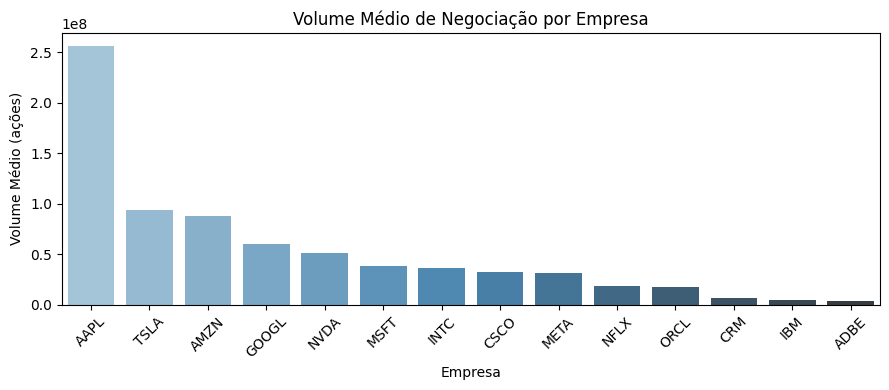

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular volume médio por empresa
df_volume = df_merged.groupby('stock_symbol')['volume'].mean().reset_index()
df_volume = df_volume.sort_values(by='volume', ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(9,4))
sns.barplot(data=df_volume, x='stock_symbol', y='volume', palette='Blues_d')
plt.title('Volume Médio de Negociação por Empresa')
plt.ylabel('Volume Médio (ações)')
plt.xlabel('Empresa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##✅ Segmentação final para investidores com base na volatilidade

In [25]:
# Calcular desvio padrão por empresa
df_volatilidade = df_merged.groupby('stock_symbol')['close'].std().reset_index()
df_volatilidade.columns = ['stock_symbol', 'std_close']

# Combinar com classificação de risco
df_segmentacao = df_amplitude[['amplitude', 'perfil_risco']].merge(df_volatilidade, on='stock_symbol')
df_segmentacao = df_segmentacao.sort_values(by='std_close', ascending=False)

print(df_segmentacao)


   stock_symbol   amplitude perfil_risco   std_close
10         NFLX  684.671431    Agressivo  178.877130
1          ADBE  665.679994    Agressivo  173.466083
13         TSLA  408.916668    Agressivo   95.544413
9          MSFT  320.099985    Agressivo   88.234393
8          META  364.449993    Agressivo   86.763257
3           CRM  294.439991     Moderado   71.213839
11         NVDA  331.540010    Agressivo   69.480441
2          AMZN  181.139996     Moderado   54.085034
0          AAPL  175.151066     Moderado   47.344344
5         GOOGL  138.925838     Moderado   35.803048
6           IBM  115.707458     Moderado   24.016125
12         ORCL   82.190003  Conservador   16.863128
7          INTC   50.800001  Conservador   12.912266
4          CSCO   50.229999  Conservador   12.646739


##✅ Código para criar a tabela final resumida por empresa

In [26]:
# Agrupando: amplitude, desvio padrão, volume médio
df_agg = df_merged.groupby('stock_symbol').agg(
    preco_min=('close', 'min'),
    preco_max=('close', 'max'),
    amplitude=('close', lambda x: x.max() - x.min()),
    desvio_padrao=('close', 'std'),
    volume_medio=('volume', 'mean')
).reset_index()

# Classificar perfil de risco com base na amplitude
def classificar_risco(amplitude):
    if amplitude < 100:
        return 'Conservador'
    elif amplitude < 300:
        return 'Moderado'
    else:
        return 'Agressivo'

df_agg['perfil_risco'] = df_agg['amplitude'].apply(classificar_risco)

# Organizar colunas
df_agg = df_agg[['stock_symbol', 'preco_min', 'preco_max', 'amplitude', 'desvio_padrao', 'volume_medio', 'perfil_risco']]

# Exibir resultado
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)  # Melhorar visualização

display(df_agg.sort_values(by='amplitude', ascending=False))


,stock_symbol,preco_min,preco_max,amplitude,desvio_padrao,volume_medio,perfil_risco
10,NFLX,7.02,691.69,684.67,178.88,"18,414,854.14",Agressivo
1,ADBE,22.69,688.37,665.68,173.47,"3,814,336.66",Agressivo
13,TSLA,1.05,409.97,408.92,95.54,"93,516,465.69",Agressivo
8,META,17.73,382.18,364.45,86.76,"31,178,146.69",Agressivo
11,NVDA,2.22,333.76,331.54,69.48,"50,806,126.60",Agressivo
9,MSFT,23.01,343.11,320.10,88.23,"38,016,469.34",Agressivo
3,CRM,15.52,309.96,294.44,71.21,"6,910,973.46",Moderado
2,AMZN,5.43,186.57,181.14,54.09,"88,339,985.05",Moderado
0,AAPL,6.86,182.01,175.15,47.34,"256,325,536.41",Moderado
5,GOOGL,10.91,149.84,138.93,35.80,"60,186,468.94",Moderado


##✅ Distribuição por empresa

/tmp/ipython-input-27-255069391.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequencia_empresas, x='stock_symbol', y='frequencia', palette='viridis')


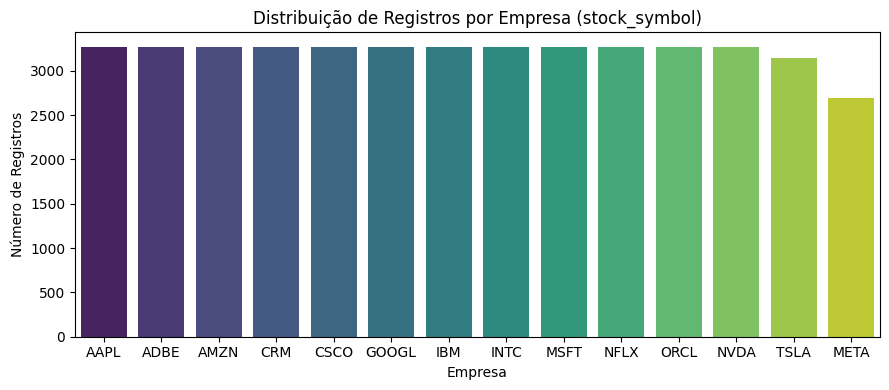

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar registros por empresa
frequencia_empresas = df_merged['stock_symbol'].value_counts().reset_index()
frequencia_empresas.columns = ['stock_symbol', 'frequencia']

# Plotar gráfico de barras
plt.figure(figsize=(9, 4))
sns.barplot(data=frequencia_empresas, x='stock_symbol', y='frequencia', palette='viridis')
plt.title('Distribuição de Registros por Empresa (stock_symbol)')
plt.xlabel('Empresa')
plt.ylabel('Número de Registros')
plt.tight_layout()
plt.show()


##✅ Proporção de registros

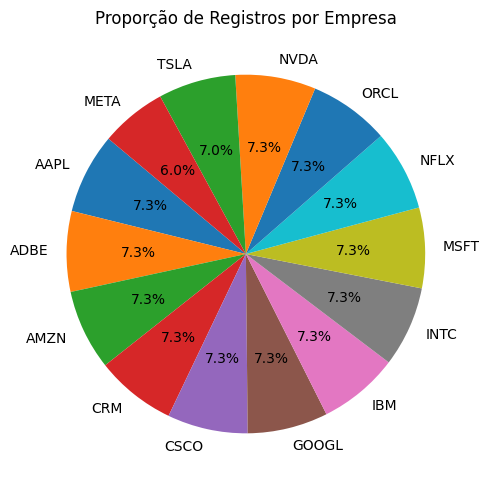

In [28]:
# Gráfico de pizza
plt.figure(figsize=(5,5))
plt.pie(frequencia_empresas['frequencia'], labels=frequencia_empresas['stock_symbol'], autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Registros por Empresa')
plt.axis('equal')  # Manter formato de círculo
plt.tight_layout()
plt.show()


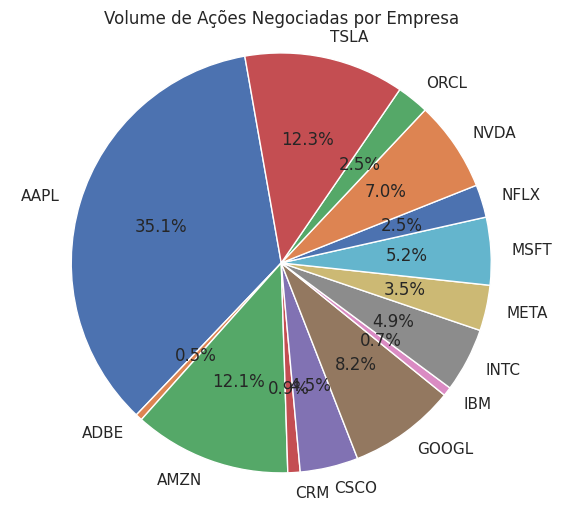

In [74]:
# Agrupar os dados por empresa e somar os volumes
volume_por_empresa = df_merged.groupby('stock_symbol')['volume'].sum()

# Criar o gráfico de pizza
plt.figure(figsize=(7,6))
plt.pie(volume_por_empresa, labels=volume_por_empresa.index, autopct='%1.1f%%', startangle=100)
plt.title('Volume de Ações Negociadas por Empresa')
plt.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo

# Salvar o gráfico como uma imagem
plt.savefig('grafico_pizza_volume.png')
plt.show()

##✅ Datas mínimas e máximas por empresa

In [30]:
# Ver intervalo de datas por empresa
intervalo_datas = df_merged.groupby('stock_symbol')['date'].agg(['min', 'max']).reset_index()
intervalo_datas.columns = ['stock_symbol', 'data_inicial', 'data_final']
print(intervalo_datas)



   stock_symbol data_inicial data_final
0          AAPL   2010-01-04 2022-12-29
1          ADBE   2010-01-04 2022-12-29
2          AMZN   2010-01-04 2022-12-29
3           CRM   2010-01-04 2022-12-29
4          CSCO   2010-01-04 2022-12-29
5         GOOGL   2010-01-04 2022-12-29
6           IBM   2010-01-04 2022-12-29
7          INTC   2010-01-04 2022-12-29
8          META   2012-05-18 2023-01-24
9          MSFT   2010-01-04 2022-12-29
10         NFLX   2010-01-04 2022-12-29
11         NVDA   2010-01-04 2022-12-29
12         ORCL   2010-01-04 2022-12-29
13         TSLA   2010-06-30 2022-12-29


##✅ Medidas de Tendência Central

In [31]:
# Medidas de tendência central agrupadas por empresa
df_tendencia = df_merged.groupby('stock_symbol').agg(
    media_close=('close', 'mean'),
    mediana_close=('close', 'median'),
    moda_close=('close', lambda x: x.mode().iloc[0] if not x.mode().empty else None),
    media_volume=('volume', 'mean'),
    mediana_volume=('volume', 'median'),
    moda_volume=('volume', lambda x: x.mode().iloc[0] if not x.mode().empty else None)
).reset_index()

# Exibir resultado
pd.set_option('display.float_format', '{:,.2f}'.format)
display(df_tendencia)


,stock_symbol,media_close,mediana_close,moda_close,media_volume,mediana_volume,moda_volume
0,AAPL,51.30,29.81,24.33,"256,325,536.41","166,674,000.00","90,956,700.00"
1,ADBE,186.02,97.72,30.95,"3,814,336.66","2,948,500.00","1,970,900.00"
2,AMZN,58.91,36.38,6.29,"88,339,985.05","74,592,000.00","58,272,000.00"
3,CRM,103.40,76.26,37.80,"6,910,973.46","5,548,800.00","2,777,100.00"
4,CSCO,33.50,29.54,24.70,"32,696,560.26","25,482,400.00","16,717,800.00"
5,GOOGL,49.15,38.54,14.51,"60,186,468.94","41,234,000.00","30,594,000.00"
6,IBM,148.47,143.04,140.04,"5,036,544.90","4,345,189.00","2,590,001.00"
7,INTC,36.49,34.34,21.46,"36,071,695.51","29,874,600.00","17,830,400.00"
8,META,147.91,142.07,26.85,"31,178,146.69","23,239,000.00","10,793,800.00"
9,MSFT,100.07,55.70,25.81,"38,016,469.34","32,280,800.00","20,818,000.00"


##✅ Preço de fechamento ao longo do tempo

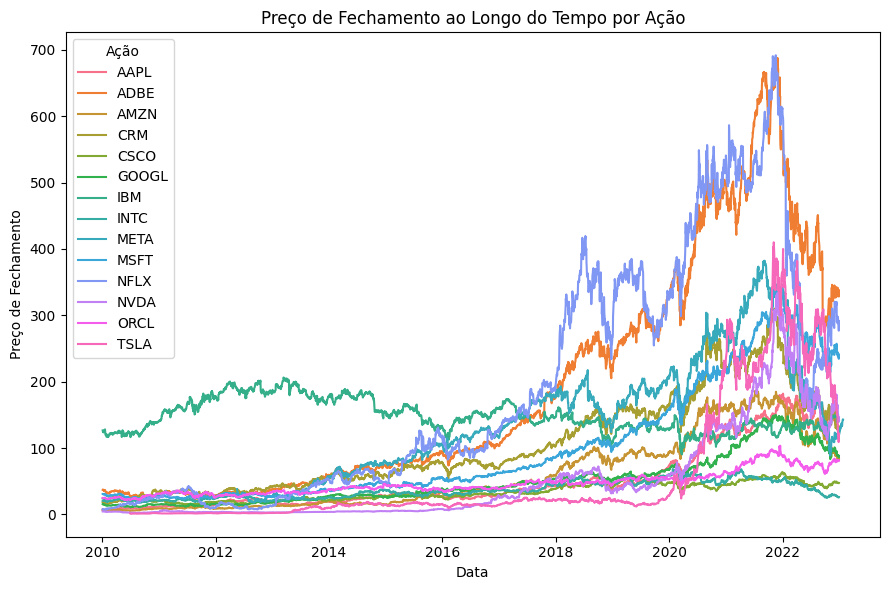

In [32]:
# Visualizar comportamento ao longo do tempo (linha de preço por ação)
plt.figure(figsize=(9,6))
sns.lineplot(data=df_merged, x='date', y='close', hue='stock_symbol')
plt.title('Preço de Fechamento ao Longo do Tempo por Ação')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend(title='Ação')
plt.tight_layout()
plt.show()

##✅ Média vs. mediana do preço de fechamento por empresa

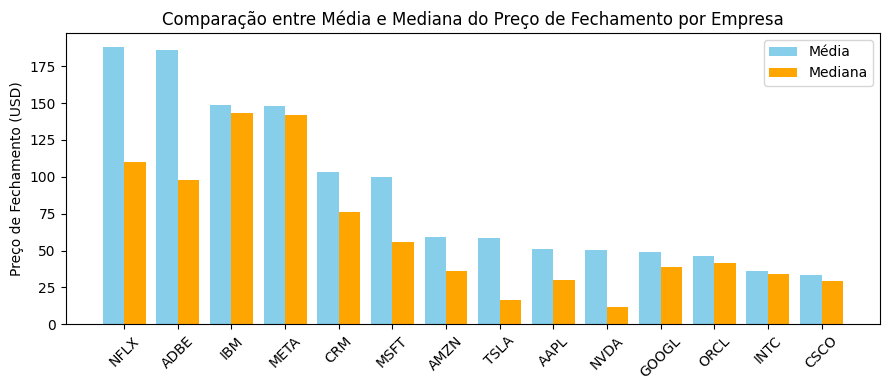

In [33]:
# Plotar gráfico de barras lado a lado: média vs mediana do preço de fechamento
import numpy as np

df_tendencia_sorted = df_tendencia.sort_values(by='media_close', ascending=False)
x = np.arange(len(df_tendencia_sorted['stock_symbol']))

plt.figure(figsize=(9,4))
plt.bar(x - 0.2, df_tendencia_sorted['media_close'], width=0.4, label='Média', color='skyblue')
plt.bar(x + 0.2, df_tendencia_sorted['mediana_close'], width=0.4, label='Mediana', color='orange')
plt.xticks(x, df_tendencia_sorted['stock_symbol'], rotation=45)
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Comparação entre Média e Mediana do Preço de Fechamento por Empresa')
plt.legend()
plt.tight_layout()
plt.show()


##🔍 Distribuição do preço de fechamento (Histograma + Densidade)

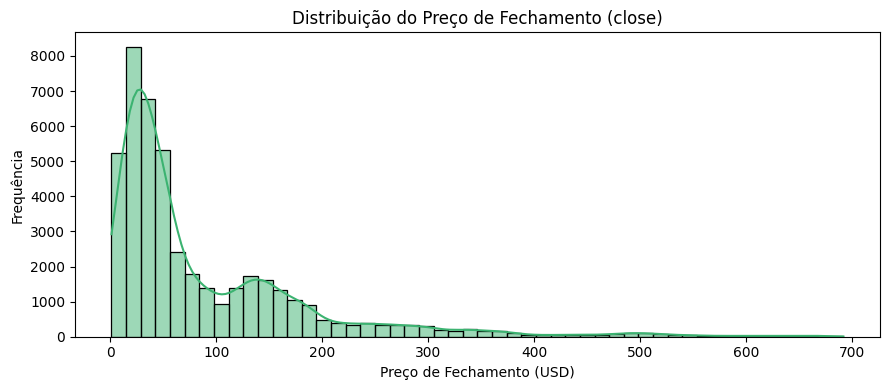

In [34]:
plt.figure(figsize=(9,4))
sns.histplot(df_prices['close'], kde=True, bins=50, color='mediumseagreen')
plt.title('Distribuição do Preço de Fechamento (close)')
plt.xlabel('Preço de Fechamento (USD)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


##🔍 Distribuição do volume (escala logarítmica por ser muito assimétrico)

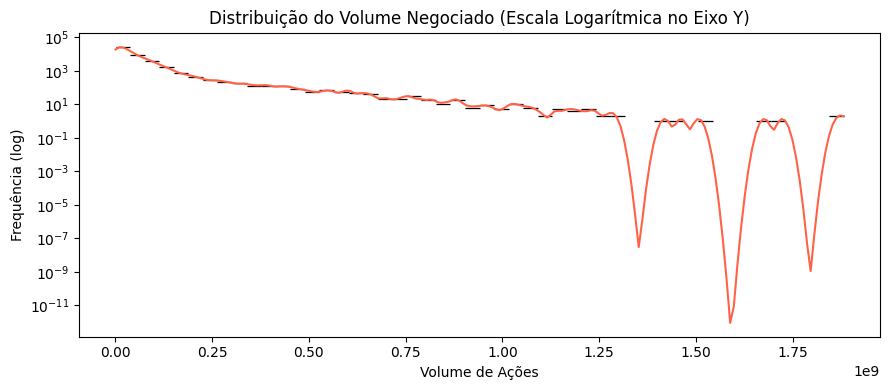

In [35]:
plt.figure(figsize=(9,4))
sns.histplot(df_prices['volume'], kde=True, bins=50, color='tomato', log_scale=(False, True))
plt.title('Distribuição do Volume Negociado (Escala Logarítmica no Eixo Y)')
plt.xlabel('Volume de Ações')
plt.ylabel('Frequência (log)')
plt.tight_layout()
plt.show()


##📊 Medidas de dispersão das variáveis numéricas

In [36]:
# Selecionar colunas numéricas principais
variaveis = ['open', 'high', 'low', 'close', 'adj_close', 'volume']

# Calcular medidas de dispersão
for var in variaveis:
    std = df_merged[var].std()
    var_ = df_merged[var].var()
    q1 = df_merged[var].quantile(0.25)
    q3 = df_merged[var].quantile(0.75)
    iqr = q3 - q1

    print(f"\n🔹 Variável: {var}")
    print(f"Desvio Padrão: {std:.2f}")
    print(f"Variância: {var_:.2f}")
    print(f"IQR (Q3 - Q1): {iqr:.2f}")



🔹 Variável: open
Desvio Padrão: 101.63
Variância: 10328.04
IQR (Q3 - Q1): 102.99

🔹 Variável: high
Desvio Padrão: 103.00
Variância: 10609.22
IQR (Q3 - Q1): 103.92

🔹 Variável: low
Desvio Padrão: 100.12
Variância: 10024.90
IQR (Q3 - Q1): 101.89

🔹 Variável: close
Desvio Padrão: 101.59
Variância: 10321.12
IQR (Q3 - Q1): 102.98

🔹 Variável: adj_close
Desvio Padrão: 101.00
Variância: 10200.19
IQR (Q3 - Q1): 91.60

🔹 Variável: volume
Desvio Padrão: 93247295.87
Variância: 8695058187601383.00
IQR (Q3 - Q1): 48768250.00


##✅ Calculo quartil

In [37]:
# Calculo quartil

# Selecionar apenas colunas numéricas
df_numericas = df_merged.select_dtypes(include='number')

# Calcular os quartis: 25% (Q1), 50% (mediana ou Q2), 75% (Q3)
quartis = df_numericas.quantile([0.25, 0.5, 0.75]).transpose()
quartis.columns = ['Q1 (25%)', 'Q2 (Mediana)', 'Q3 (75%)']

# Exibir os quartis
print(quartis)


                   Q1 (25%)  Q2 (Mediana)      Q3 (75%)
open                  25.67         47.93        128.66
high                  25.93         48.46        129.85
low                   25.36         47.47        127.25
close                 25.66         47.97        128.64
adj_close             22.08         45.38        113.67
volume         9,629,425.00 26,463,150.00 58,397,675.00
variacao_media         0.44          0.94          2.32


In [38]:
# Correlação de Pearson

# Selecionar apenas as colunas numéricas
df_numericas = df_merged.select_dtypes(include='number')

# Calcular a matriz de correlação de Pearson
correlacao = df_numericas.corr(method='pearson')

# Exibir a matriz
print("Correlação de Pearson entre variáveis numéricas:")
print(correlacao.round(2))

Correlação de Pearson entre variáveis numéricas:
                open  high   low  close  adj_close  volume  variacao_media
open            1.00  1.00  1.00   1.00       0.99   -0.22            0.79
high            1.00  1.00  1.00   1.00       0.99   -0.22            0.80
low             1.00  1.00  1.00   1.00       0.99   -0.23            0.79
close           1.00  1.00  1.00   1.00       0.99   -0.22            0.79
adj_close       0.99  0.99  0.99   0.99       1.00   -0.21            0.80
volume         -0.22 -0.22 -0.23  -0.22      -0.21    1.00           -0.10
variacao_media  0.79  0.80  0.79   0.79       0.80   -0.10            1.00


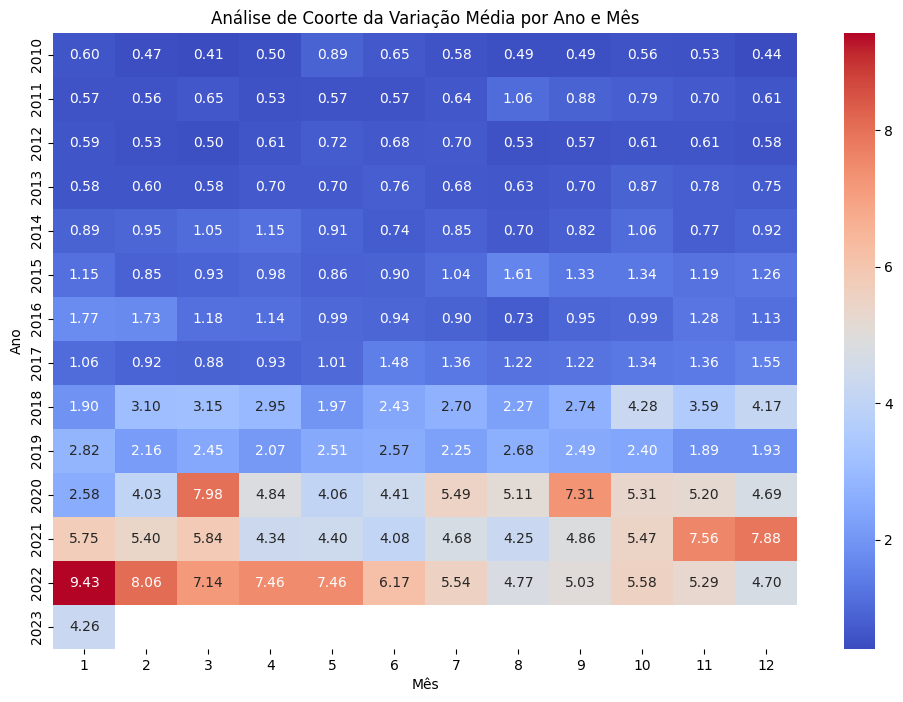

In [39]:
# Ensure 'date' column is datetime objects
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Extract year and month from the 'date' column
df_merged['year'] = df_merged['date'].dt.year
df_merged['month'] = df_merged['date'].dt.month

# Agrupar os dados por ano e mês
cohort_data = df_merged.groupby(['year', 'month']).agg({
    'close': 'mean',
    'variacao_media': 'mean'
}).reset_index()

# Pivotar os dados para uma tabela de coorte
cohort_pivot = cohort_data.pivot(index='year', columns='month', values='variacao_media')

# Plotar a tabela de coorte
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Análise de Coorte da Variação Média por Ano e Mês')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()

##📊 Código para matriz de correlação e mapa de calor

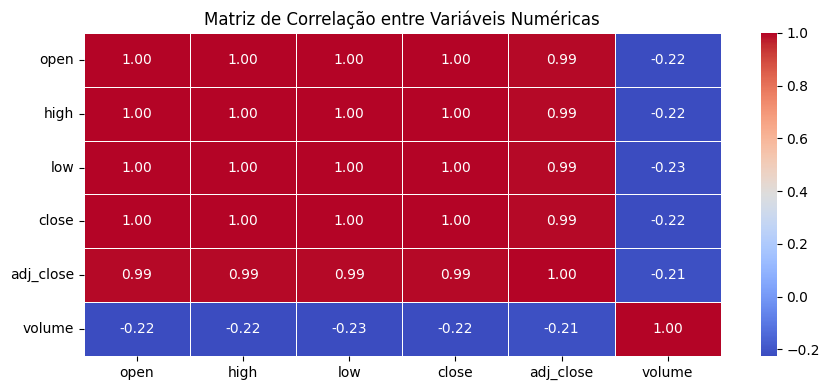

In [40]:
# Matriz de correlação de Pearson
matriz_corr = df_merged[variaveis].corr(method='pearson')

# Exibir mapa de calor
plt.figure(figsize=(9, 4))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()


##✅ Validação de hipótese

In [41]:
import pandas as pd
from scipy.stats import ttest_ind

# Calcular volume médio e desvio padrão do close por empresa
df_agg = df_merged.groupby('stock_symbol').agg(
    volume_medio=('volume', 'mean'),
    desvio_close=('close', 'std')
).reset_index()

# Definir ponto de corte: mediana do volume
mediana_volume = df_agg['volume_medio'].median()

# Criar grupos
grupo_alto = df_agg[df_agg['volume_medio'] >= mediana_volume]['desvio_close']
grupo_baixo = df_agg[df_agg['volume_medio'] < mediana_volume]['desvio_close']

# Aplicar teste t de comparação de médias
t_stat, p_valor = ttest_ind(grupo_alto, grupo_baixo, equal_var=False)

print("Teste t: comparação de desvio padrão entre grupos de volume")
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor-p: {p_valor:.4f}")

# Ver médias dos grupos
print("\nMédia do desvio padrão:")
print(f"Grupo de ALTO volume: {grupo_alto.mean():.2f}")
print(f"Grupo de BAIXO volume: {grupo_baixo.mean():.2f}")


Teste t: comparação de desvio padrão entre grupos de volume
Estatística t: -0.7895
Valor-p: 0.4527

Média do desvio padrão:
Grupo de ALTO volume: 57.63
Grupo de BAIXO volume: 80.55


🎯 Hipótese testada

H₀ (nula): Empresas com alto volume médio de negociação não têm diferença significativa na volatilidade (desvio padrão dos preços) em relação às empresas com baixo volume.

H₁ (alternativa): Empresas com alto volume médio são mais voláteis.

---
📌 Conclusão técnica

O valor-p = 0.4527 é muito maior que 0.05, portanto:

Não rejeitamos a hipótese nula.

Isso significa que não há evidência estatística suficiente para afirmar que empresas com alto volume médio são mais voláteis.

Na verdade, neste caso, as empresas com baixo volume apresentaram, em média, volatilidade maior.

In [42]:
# Criar coluna de variação percentual e flag de alta ≥ 5%
df_rr = df_merged.copy()
df_rr['pct_var'] = (df_rr['close'] - df_rr['open']) / df_rr['open']
df_rr['subiu_5pct'] = df_rr['pct_var'] >= 0.05

# Exemplo: comparar TSLA e MSFT
grupo_tsla = df_rr[df_rr['stock_symbol'] == 'TSLA']
grupo_ibm = df_rr[df_rr['stock_symbol'] == 'IBM'] # This line uses df_rr

# Calcular proporção de dias com alta ≥ 5%
p_tsla = grupo_tsla['subiu_5pct'].mean()
p_ibm = grupo_ibm['subiu_5pct'].mean()

# Calcular risco relativo
risco_relativo = p_tsla / p_ibm

# Exibir resultado formatado
print(f"Probabilidade TSLA: {p_tsla:.2%}")
print(f"Probabilidade IBM: {p_ibm:.2%}")
print(f"Risco Relativo (TSLA / IBM): {risco_relativo:.2f}")


Probabilidade TSLA: 4.07%
Probabilidade IBM: 0.15%
Risco Relativo (TSLA / IBM): 26.60


In [43]:
# Corrigir a coluna 'subiu_5pct' se estiver como string
df_rr['subiu_5pct'] = df_rr['subiu_5pct'].astype(str).str.upper().map({'TRUE': True, 'FALSE': False})

# Calcular proporção de dias com alta ≥ 5% por empresa
proporcao_alta = df_rr.groupby('stock_symbol')['subiu_5pct'].mean().sort_values(ascending=False)

# Definir como base a empresa com menor proporção (referência conservadora)
referencia = proporcao_alta.min()

# Calcular risco relativo com base na referência
ranking_rr = (proporcao_alta / referencia).reset_index()
ranking_rr.columns = ['Empresa', 'Risco Relativo']

# Adicionar coluna com a probabilidade real formatada
ranking_rr['Probabilidade Alta ≥ 5%'] = (proporcao_alta.values * 100).round(2).astype(str) + '%'

# Ordenar do mais agressivo para o mais conservador
ranking_rr = ranking_rr.sort_values('Risco Relativo', ascending=False).reset_index(drop=True)

# Exibir resultado
ranking_rr


,Empresa,Risco Relativo,Probabilidade Alta ≥ 5%
0,TSLA,33.25,4.07%
1,NFLX,22.00,2.69%
2,NVDA,16.25,1.99%
3,CRM,9.75,1.19%
4,META,8.82,1.08%
5,AMZN,4.50,0.55%
6,ADBE,3.75,0.46%
7,INTC,3.25,0.4%
8,AAPL,2.75,0.34%
9,MSFT,2.50,0.31%


##📈 Evolução temporal do preço médio por empresa

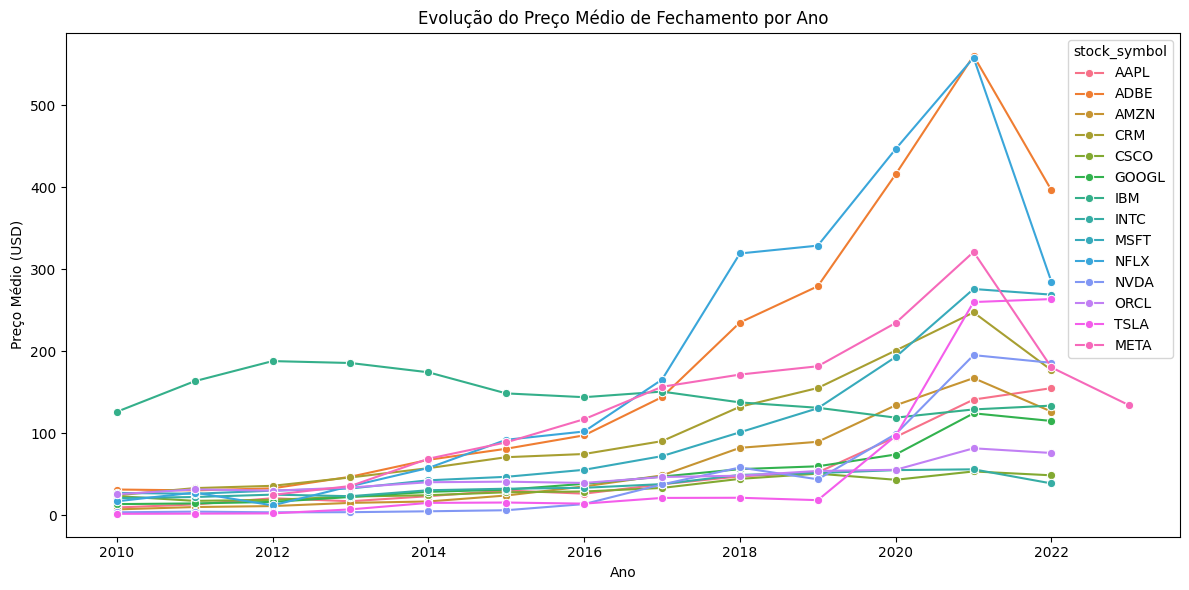

In [44]:
df_merged['ano'] = df_merged['date'].dt.year
media_ano = df_merged.groupby(['ano', 'stock_symbol'])['close'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=media_ano, x='ano', y='close', hue='stock_symbol', marker='o')
plt.title('Evolução do Preço Médio de Fechamento por Ano')
plt.ylabel('Preço Médio (USD)')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()


##🔁 Correlação entre volume e variação diária

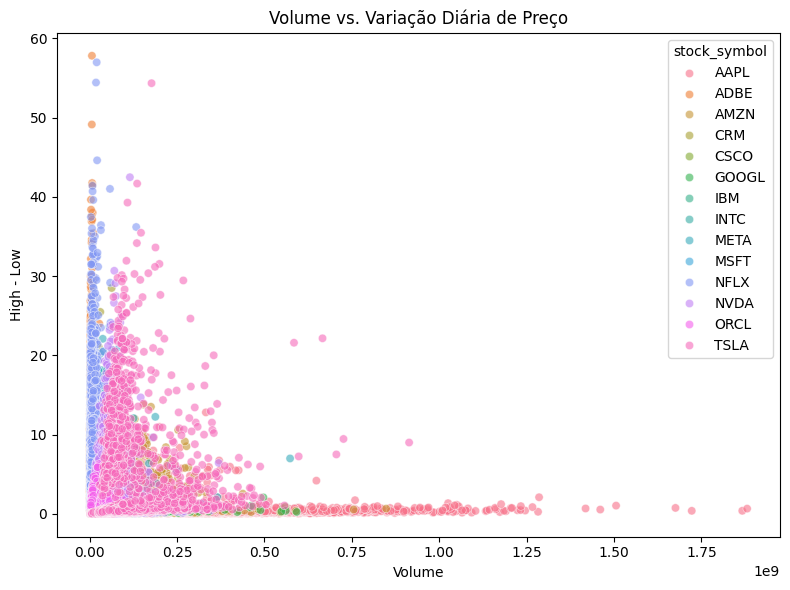

In [45]:
df_merged['variacao_diaria'] = df_merged['high'] - df_merged['low']

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x='volume', y='variacao_diaria', hue='stock_symbol', alpha=0.6)
plt.title('Volume vs. Variação Diária de Preço')
plt.xlabel('Volume')
plt.ylabel('High - Low')
plt.tight_layout()
plt.show()


##✅ Segmentação por período (Ano, Mês, Trimestre)

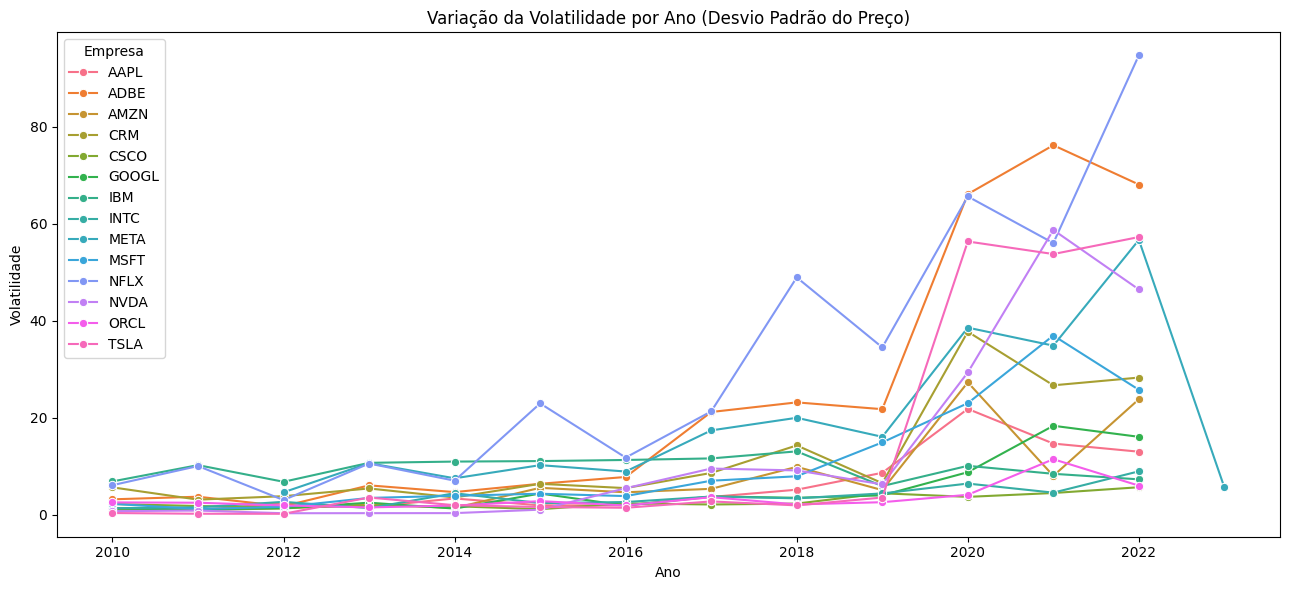

In [46]:
df_merged['ano'] = df_merged['date'].dt.year
df_merged['mes'] = df_merged['date'].dt.month

# Exemplo: calcular desvio padrão por empresa e ano
vol_ano = df_merged.groupby(['stock_symbol', 'ano'])['close'].std().reset_index()
vol_ano.columns = ['Empresa', 'Ano', 'Desvio_Padrão_Close']

plt.figure(figsize=(13,6))
sns.lineplot(data=vol_ano, x='Ano', y='Desvio_Padrão_Close', hue='Empresa', marker='o')
plt.title('Variação da Volatilidade por Ano (Desvio Padrão do Preço)')
plt.ylabel('Volatilidade')
plt.tight_layout()
plt.show()


##✅ Análise por coorte (ex: NFLX antes/depois 2018)

In [47]:
df_nflx = df_merged[df_merged['stock_symbol'] == 'NFLX'].copy() # Adicionar .copy() para evitar SettingWithCopyWarning
df_nflx['coorte'] = df_nflx['date'].apply(lambda x: 'Antes 2018' if x < pd.Timestamp('2018-01-01') else 'Depois 2018')

# Comparar média e desvio padrão
df_nflx.groupby('coorte')['close'].agg(['mean', 'std', 'median'])


,mean,std,median
coorte,,,
Antes 2018,63.53,51.29,48.07
Depois 2018,387.83,119.40,361.87


##✅ Validar hipóteses (ex: volume AMZN antes/depois de evento)

In [48]:
import pandas as pd
from scipy.stats import ttest_ind

df_amzn = df_merged[df_merged['stock_symbol'] == 'AMZN'].copy() # Adicionar .copy() para evitar SettingWithCopyWarning

# Converter a string para Timestamp antes de comparar
df_amzn['periodo'] = df_amzn['date'].apply(lambda x: 'Antes 2020' if x < pd.Timestamp('2020-01-01') else 'Depois 2020')

# Teste t
v1 = df_amzn[df_amzn['periodo'] == 'Antes 2020']['volume']
v2 = df_amzn[df_amzn['periodo'] == 'Depois 2020']['volume']
t_stat, p_valor = ttest_ind(v1, v2, equal_var=False)
print(f"Estatística t: {t_stat:.4f}, Valor-p: {p_valor:.4f}")


Estatística t: 5.6380, Valor-p: 0.0000


##✅ Regressão linear (volume prevendo preço)

Coeficiente: -0.000000, Intercepto: 102.24, R²: 0.0505


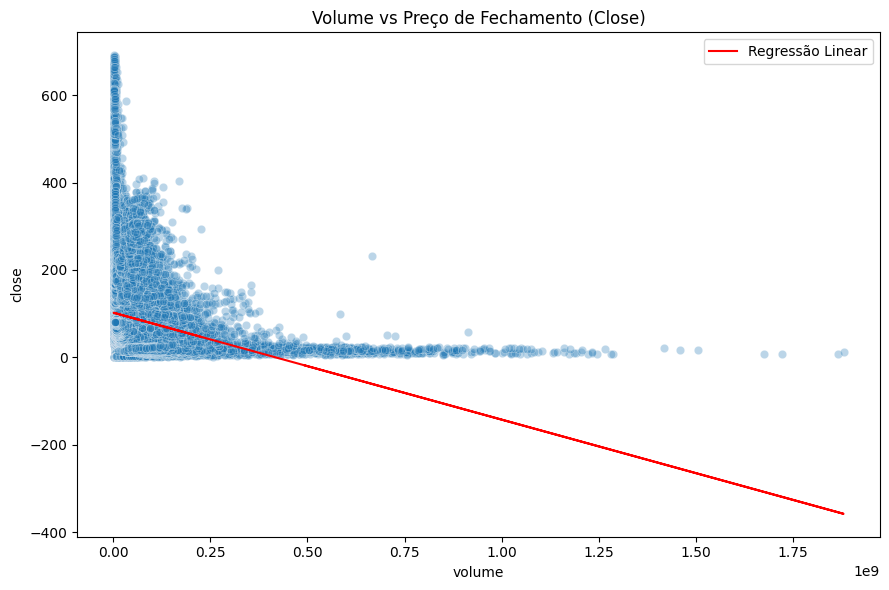

In [49]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo com todas as empresas
X = df_merged[['volume']]
y = df_merged['close']

modelo = LinearRegression()
modelo.fit(X, y)

# Coeficientes
print(f"Coeficiente: {modelo.coef_[0]:.6f}, Intercepto: {modelo.intercept_:.2f}, R²: {modelo.score(X, y):.4f}")

# Gráfico
plt.figure(figsize=(9,6))
sns.scatterplot(x='volume', y='close', data=df_merged, alpha=0.3)
plt.plot(df_merged['volume'], modelo.predict(X), color='red', label='Regressão Linear')
plt.title('Volume vs Preço de Fechamento (Close)')
plt.legend()
plt.tight_layout()
plt.show()

##✅ Risco relativo (ação subiu ≥ 5% = sim/não)

In [50]:
df_rr = df_merged.copy()
df_rr['pct_var'] = (df_rr['close'] - df_rr['open']) / df_rr['open']
df_rr['subiu_5pct'] = df_rr['pct_var'] >= 0.05

# Exemplo: comparar TSLA e MSFT
grupo_tsla = df_rr[df_rr['stock_symbol'] == 'TSLA']
grupo_msft = df_rr[df_rr['stock_symbol'] == 'MSFT']

# Probabilidade de "alta ≥ 5%"
p_tsla = grupo_tsla['subiu_5pct'].mean()
p_msft = grupo_msft['subiu_5pct'].mean()

risco_relativo = p_tsla / p_msft
print(f"Prob. TSLA: {p_tsla:.2%}, Prob. MSFT: {p_msft:.2%}, Risco Relativo: {risco_relativo:.2f}")


Prob. TSLA: 4.07%, Prob. MSFT: 0.31%, Risco Relativo: 13.30


##✅ Regressão rogística (prever se ação sobe ou não)

In [51]:
df_modelo = df_rr.copy()

# Ordenar por empresa e data
df_modelo = df_modelo.sort_values(['stock_symbol', 'date'])

# Criar colunas anteriores
df_modelo['close_anterior'] = df_modelo.groupby('stock_symbol')['close'].shift(1)
df_modelo['pct_var_anterior'] = df_modelo.groupby('stock_symbol')['pct_var'].shift(1)

# Médias móveis
df_modelo['media_movel_5d'] = df_modelo.groupby('stock_symbol')['close'].transform(lambda x: x.rolling(window=5).mean())

# Gap de abertura (abertura - fechamento anterior)
df_modelo['gap_abertura'] = (df_modelo['open'] - df_modelo['close_anterior']) / df_modelo['close_anterior']

# Variável-alvo binária (1 = subiu no dia, 0 = não subiu)
df_modelo['subiu'] = (df_modelo['close'] > df_modelo['open']).astype(int)

# Remover nulos nas variáveis
variaveis_usadas = ['volume', 'close_anterior', 'pct_var_anterior', 'media_movel_5d', 'gap_abertura']
df_modelo = df_modelo.dropna(subset=variaveis_usadas + ['subiu'])


In [52]:
from sklearn.utils import resample

# Separar classes
df_subiu = df_modelo[df_modelo['subiu'] == 1]
df_nsubiu = df_modelo[df_modelo['subiu'] == 0]

# Oversampling da classe minoritária
df_subiu_up = resample(df_subiu, replace=True, n_samples=len(df_nsubiu), random_state=42)

# Dataset balanceado
df_balanceado = pd.concat([df_subiu_up, df_nsubiu])


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Dados
X = df_balanceado[variaveis_usadas]
y = df_balanceado['subiu']

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinar modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Avaliação
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3890 1613]
 [3803 1716]]
              precision    recall  f1-score   support

           0       0.51      0.71      0.59      5503
           1       0.52      0.31      0.39      5519

    accuracy                           0.51     11022
   macro avg       0.51      0.51      0.49     11022
weighted avg       0.51      0.51      0.49     11022



##✅ Regressão linear – prever preço com volume

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = df_merged[['volume']]
y = df_merged['close']

modelo_lr = LinearRegression()
modelo_lr.fit(X, y)

# Resultados
r2 = modelo_lr.score(X, y)
coef = modelo_lr.coef_[0]
intercepto = modelo_lr.intercept_
y_pred = modelo_lr.predict(X)
erro_padrao = np.sqrt(mean_squared_error(y, y_pred))

print(f"Coeficiente (volume): {coef:.6f}")
print(f"Intercepto: {intercepto:.2f}")
print(f"R²: {r2:.4f}")
print(f"Erro padrão (RMSE): {erro_padrao:.2f}")


Coeficiente (volume): -0.000000
Intercepto: 102.24
R²: 0.0505
Erro padrão (RMSE): 98.99


##🔢 Tabela com todas as empresas e a % de dias com alta ≥ 5%

,Empresa,Proporcao (%)
0,TSLA,4.07%
1,NFLX,2.69%
2,NVDA,1.99%
3,CRM,1.19%
4,META,1.08%
5,AMZN,0.55%
6,ADBE,0.46%
7,INTC,0.4%
8,AAPL,0.34%
9,MSFT,0.31%


/tmp/ipython-input-55-2653123839.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabela_alta, x='Empresa', y='Proporcao_dias_com_alta_5pct', palette='coolwarm')
/tmp/ipython-input-55-2653123839.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


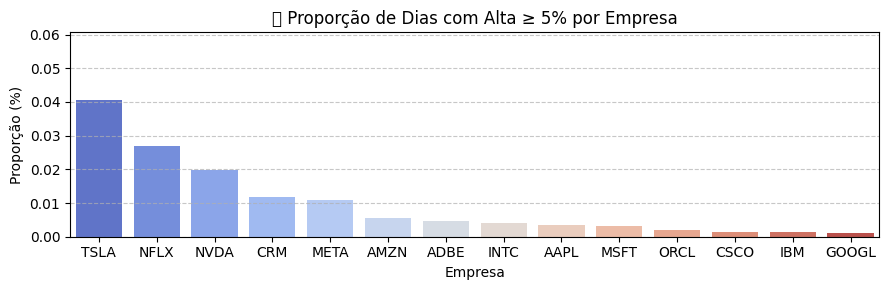

In [55]:
# Criar coluna de variação percentual e flag de alta ≥ 5%
df_rr = df_merged.copy()
df_rr['pct_var'] = (df_rr['close'] - df_rr['open']) / df_rr['open']
df_rr['subiu_5pct'] = df_rr['pct_var'] >= 0.05

# Agrupar por empresa e calcular proporção de dias com alta ≥ 5%
tabela_alta = df_rr.groupby('stock_symbol')['subiu_5pct'].mean().sort_values(ascending=False).reset_index()
tabela_alta.columns = ['Empresa', 'Proporcao_dias_com_alta_5pct']

# Exibir como porcentagem formatada
tabela_alta['Proporcao (%)'] = (tabela_alta['Proporcao_dias_com_alta_5pct'] * 100).round(2).astype(str) + '%'
display(tabela_alta[['Empresa', 'Proporcao (%)']])

# Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,3))
sns.barplot(data=tabela_alta, x='Empresa', y='Proporcao_dias_com_alta_5pct', palette='coolwarm')
plt.title('📈 Proporção de Dias com Alta ≥ 5% por Empresa')
plt.ylabel('Proporção (%)')
plt.xlabel('Empresa')
plt.ylim(0, tabela_alta['Proporcao_dias_com_alta_5pct'].max() + 0.02)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##✳️ Criar as variáveis

In [56]:
# Garantir ordenação correta por ação e data
df_rr = df_rr.sort_values(by=['stock_symbol', 'date'])

# ➕ Variáveis históricas e estatísticas
df_rr['close_anterior'] = df_rr.groupby('stock_symbol')['close'].shift(1)
df_rr['pct_var_anterior'] = df_rr.groupby('stock_symbol')['pct_var'].shift(1)
df_rr['media_movel_5d'] = df_rr.groupby('stock_symbol')['close'].rolling(5).mean().reset_index(level=0, drop=True)
df_rr['media_movel_20d'] = df_rr.groupby('stock_symbol')['close'].rolling(20).mean().reset_index(level=0, drop=True)
df_rr['desvio_padrao_5d'] = df_rr.groupby('stock_symbol')['close'].rolling(5).std().reset_index(level=0, drop=True)

# ➕ Indicadores de risco
df_rr['amplitude_diaria'] = df_rr['high'] - df_rr['low']
df_rr['volatilidade_relativa'] = df_rr['amplitude_diaria'] / df_rr['open']

# ➕ Variáveis de tempo
df_rr['dia_da_semana'] = df_rr['date'].dt.day_name()
df_rr['trimestre'] = df_rr['date'].dt.to_period("Q")

# ➕ Gap de abertura
df_rr['gap_abertura'] = (df_rr['open'] > df_rr['close_anterior'] * 1.02).astype(int)

# Visualizar últimas linhas com as novas variáveis
df_rr.tail(10)


,stock_symbol,date,open,high,low,close,adj_close,volume,company,variacao_media,...,close_anterior,pct_var_anterior,media_movel_5d,media_movel_20d,desvio_padrao_5d,amplitude_diaria,volatilidade_relativa,dia_da_semana,trimestre,gap_abertura
45078,TSLA,2022-12-15,153.44,160.93,153.28,157.67,157.67,"122,334,500.00","Tesla, Inc.",7.65,...,156.80,-0.02,164.46,177.36,9.24,7.65,0.05,Thursday,2022Q4,0
45079,TSLA,2022-12-16,159.64,160.99,150.04,150.23,150.23,"139,032,200.00","Tesla, Inc.",10.95,...,157.67,0.03,158.69,175.72,6.42,10.95,0.07,Friday,2022Q4,0
45080,TSLA,2022-12-19,154.00,155.25,145.82,149.87,149.87,"139,390,600.00","Tesla, Inc.",9.43,...,150.23,-0.06,155.10,174.20,4.87,9.43,0.06,Monday,2022Q4,1
45081,TSLA,2022-12-20,146.05,148.47,137.66,137.80,137.80,"159,563,300.00","Tesla, Inc.",10.81,...,149.87,-0.03,150.47,172.70,7.95,10.81,0.07,Tuesday,2022Q4,0
45082,TSLA,2022-12-21,139.34,141.26,135.89,137.57,137.57,"145,417,400.00","Tesla, Inc.",5.37,...,137.80,-0.06,146.63,171.08,8.74,5.37,0.04,Wednesday,2022Q4,0
45083,TSLA,2022-12-22,136.00,136.63,122.26,125.35,125.35,"210,090,300.00","Tesla, Inc.",14.37,...,137.57,-0.01,140.16,168.19,10.34,14.37,0.11,Thursday,2022Q4,0
45084,TSLA,2022-12-23,126.37,128.62,121.02,123.15,123.15,"166,989,700.00","Tesla, Inc.",7.60,...,125.35,-0.08,134.75,165.20,10.83,7.60,0.06,Friday,2022Q4,0
45085,TSLA,2022-12-27,117.50,119.67,108.76,109.10,109.10,"208,643,400.00","Tesla, Inc.",10.91,...,123.15,-0.03,126.59,161.51,11.89,10.91,0.09,Tuesday,2022Q4,0
45086,TSLA,2022-12-28,110.35,116.27,108.24,112.71,112.71,"221,070,500.00","Tesla, Inc.",8.03,...,109.10,-0.07,121.58,158.10,11.26,8.03,0.07,Wednesday,2022Q4,0
45087,TSLA,2022-12-29,120.39,123.57,117.50,121.82,121.82,"221,923,300.00","Tesla, Inc.",6.07,...,112.71,0.02,118.43,154.46,7.10,6.07,0.05,Thursday,2022Q4,1


##✅Gráfico de close vs media_movel_5d e media_movel_20d

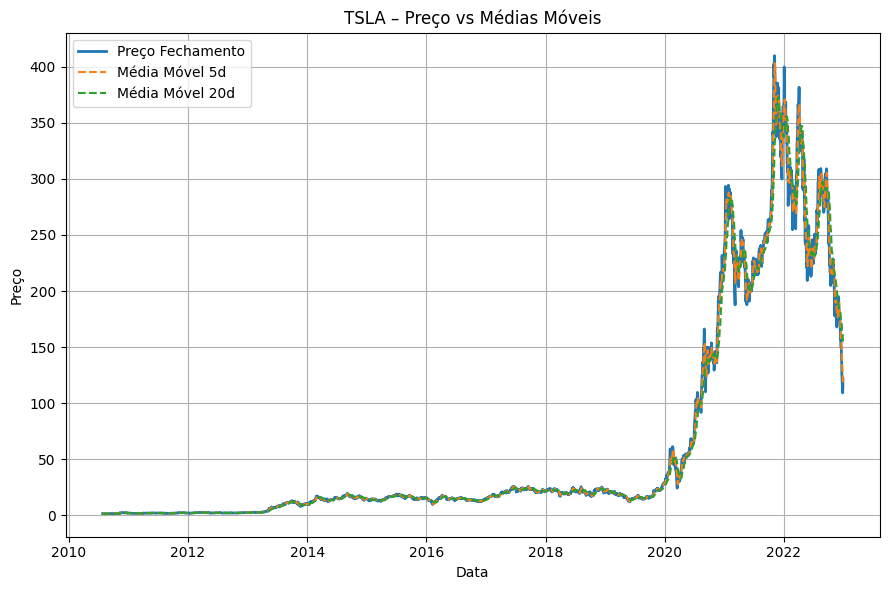

In [57]:

import matplotlib.pyplot as plt

empresa_exemplo = 'TSLA'  # troque por AAPL, NFLX, etc.
df_empresa = df_rr[df_rr['stock_symbol'] == empresa_exemplo].dropna()

plt.figure(figsize=(9,6))
plt.plot(df_empresa['date'], df_empresa['close'], label='Preço Fechamento', linewidth=2)
plt.plot(df_empresa['date'], df_empresa['media_movel_5d'], label='Média Móvel 5d', linestyle='--')
plt.plot(df_empresa['date'], df_empresa['media_movel_20d'], label='Média Móvel 20d', linestyle='--')
plt.title(f'{empresa_exemplo} – Preço vs Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##✅ Distribuição de volatilidade

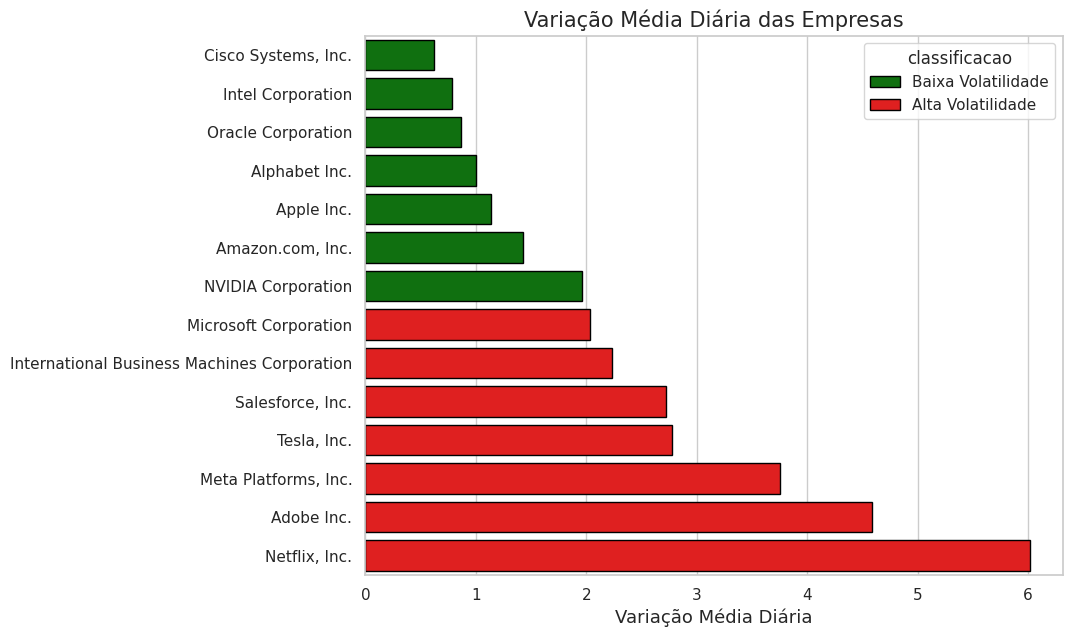

In [58]:
# Gráficos para mostrar a distribuição de volatilidade.
# Definir o palete de cores para as classificações
cores = {'Baixa Volatilidade': 'green', 'Alta Volatilidade': 'red'}

# Definir o estilo dos gráficos
sns.set(style="whitegrid")

# Ordenar as empresas pela variação média (do menor para o maior)
variacao_media_por_empresa = variacao_media_por_empresa.sort_values(by='variacao_media', ascending=True)

# Criar o gráfico de barras sem a variável 'hue'
plt.figure(figsize=(9,7))
sns.barplot(
    x='variacao_media',
    y='company',
    hue='classificacao',
    data=variacao_media_por_empresa,
    palette=cores,
    edgecolor='black'
)

# Adicionar título e rótulos aos eixos
plt.title('Variação Média Diária das Empresas', fontsize=15)
plt.xlabel('Variação Média Diária', fontsize=13)
plt.ylabel('')

# Mostrar o gráfico
plt.show()

##✅ Volatilidade_relativa

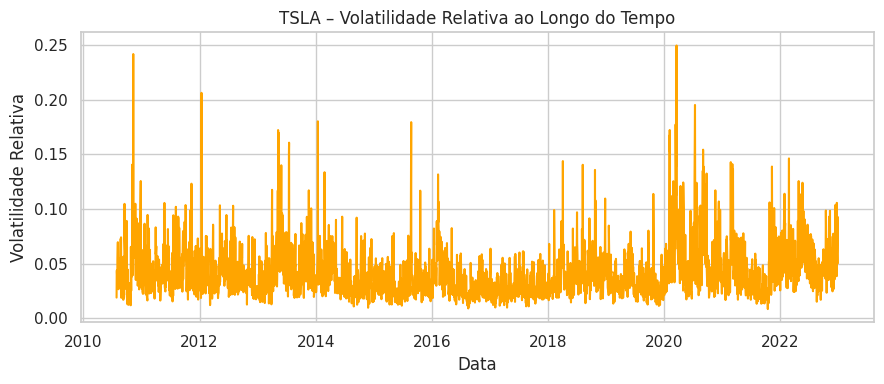

In [59]:
plt.figure(figsize=(9,4))
plt.plot(df_empresa['date'], df_empresa['volatilidade_relativa'], color='orange')
plt.title(f'{empresa_exemplo} – Volatilidade Relativa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Volatilidade Relativa')
plt.grid(True)
plt.tight_layout()
plt.show()


##✅ Gap_abertura por empresa

/tmp/ipython-input-60-3019366884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gap_por_empresa.index, y=gap_por_empresa.values, palette='viridis')


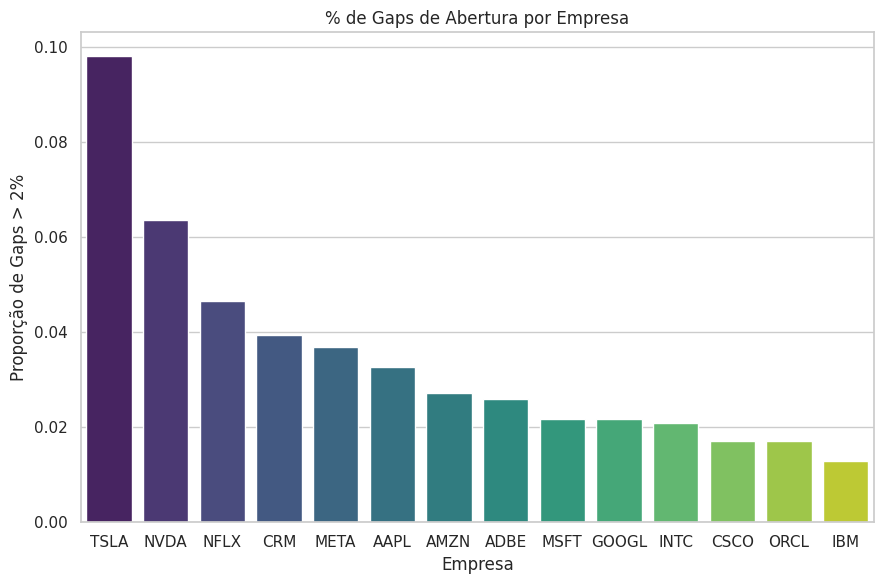

In [60]:
import seaborn as sns

gap_por_empresa = df_rr.groupby('stock_symbol')['gap_abertura'].mean().sort_values(ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(x=gap_por_empresa.index, y=gap_por_empresa.values, palette='viridis')
plt.title('% de Gaps de Abertura por Empresa')
plt.ylabel('Proporção de Gaps > 2%')
plt.xlabel('Empresa')
plt.tight_layout()
plt.show()


##✅ Ranking de risco relativo

/tmp/ipython-input-61-2337765969.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_rr, x='Empresa', y='Risco Relativo', palette='rocket')


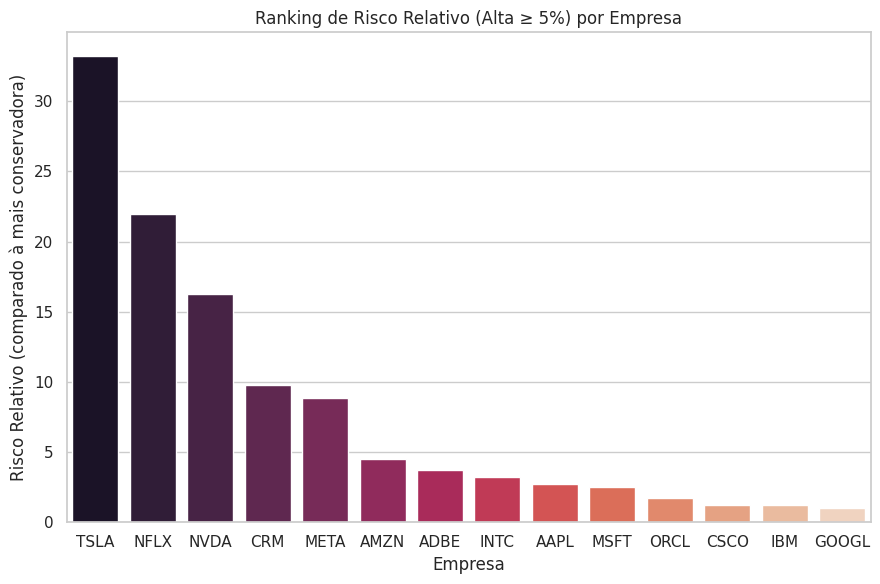

In [61]:
import seaborn as sns

# Corrigir o tipo da coluna subiu_5pct, se veio como texto
df_rr['subiu_5pct'] = df_rr['subiu_5pct'].astype(str).str.upper().map({'TRUE': True, 'FALSE': False})

# Calcular a proporção de dias com alta ≥ 5% por empresa
proporcao_alta = df_rr.groupby('stock_symbol')['subiu_5pct'].mean()
referencia = proporcao_alta.min()

# Construir ranking de risco relativo
ranking_rr = (proporcao_alta / referencia).reset_index()
ranking_rr.columns = ['Empresa', 'Risco Relativo']
ranking_rr['Probabilidade Alta ≥ 5%'] = (proporcao_alta.values * 100).round(2)
ranking_rr['Risco Relativo'] = ranking_rr['Risco Relativo'].round(2)
ranking_rr = ranking_rr.sort_values('Risco Relativo', ascending=False).reset_index(drop=True)

# Gerar gráfico de barras
plt.figure(figsize=(9,6))
sns.barplot(data=ranking_rr, x='Empresa', y='Risco Relativo', palette='rocket')
plt.title('Ranking de Risco Relativo (Alta ≥ 5%) por Empresa')
plt.ylabel('Risco Relativo (comparado à mais conservadora)')
plt.xlabel('Empresa')
plt.tight_layout()
plt.show()


In [62]:
# Juntar a classificação de risco no df_rr com base no stock_symbol
df_rr = pd.merge(df_rr, df_segmentacao[['stock_symbol', 'perfil_risco']], on='stock_symbol', how='left')

In [63]:
df_rr.to_excel("dados_tratados_com_perfil_risco.xlsx", index=False)

from google.colab import files
files.download("dados_tratados_com_perfil_risco.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Projeto 4 – Análise de ações big techs

**Objetivo**: Explorar, limpar e analisar dados históricos de ações de empresas de tecnologia, com foco em volatilidade, perfil de risco, e construção de insights úteis para investidores com diferentes perfis.

---

## Etapas de limpeza e preparação

- Exclusão de valores nulos e duplicados
- Padronização de tipos e criação de colunas derivadas (variação %, médias móveis, volatilidade)
- Integração de metadados (nome das empresas)
- Geração de novas métricas como: `subiu_5pct`, `gap_abertura`, `perfil_risco`, `close_anterior`, `pct_var_anterior`, `media_movel_5d`, `media_movel_20d`, `desvio_padrao_5d`, `amplitude_diaria`, `volatilidade_relativa`, `trimestre`, `dia_da_semana`

---

## Classificação de risco

Amplitude e classificação de risco:
Empresas foram classificadas em três perfis com base na variação histórica de preços:

**Agressivas**: TSLA, NFLX, META

**Moderadas**: MSFT, AMZN, AAPL

**Conservadoras**: IBM, ORCL, CSCO

- A classificação automática em Conservador, Moderado e Agressivo permite orientar decisões conforme o perfil do investidor.

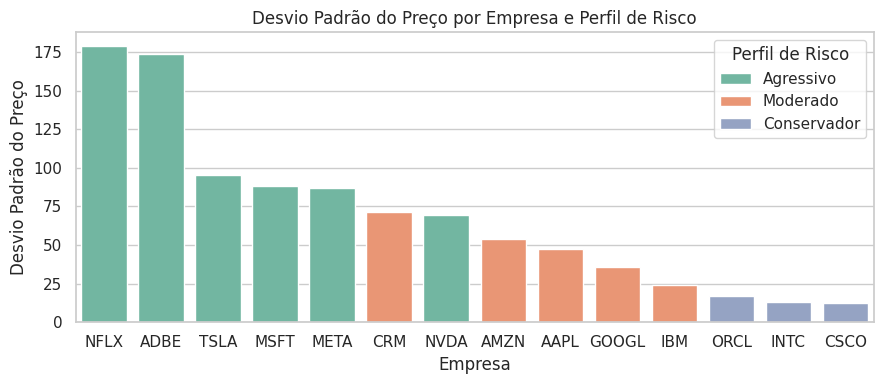

In [64]:
# 2. Gráfico de Barras: Amplitude ou Desvio Padrão por Empresa

df_agg_sorted = df_agg.sort_values('desvio_close', ascending=False)

# Merge df_agg_sorted with df_segmentacao to include 'perfil_risco'
df_agg_sorted = pd.merge(df_agg_sorted, df_segmentacao[['stock_symbol', 'perfil_risco']], on='stock_symbol', how='left')


plt.figure(figsize=(9,4))
sns.barplot(x='stock_symbol', y='desvio_close', hue='perfil_risco', data=df_agg_sorted, palette='Set2')
plt.title('Desvio Padrão do Preço por Empresa e Perfil de Risco')
plt.xlabel('Empresa')
plt.ylabel('Desvio Padrão do Preço')
plt.legend(title='Perfil de Risco')
plt.tight_layout()
plt.show()

---

# Análise técnica e estatística

**Volatilidade e Perfil de Risco**

- Empresas com maior variação de preço são mais arriscadas ações como TSLA, NFLX e META apresentaram alta volatilidade, amplitude de preço elevada e maior frequência de oscilações superiores a 5%.

- Já GOOGL, ORCL e IBM se destacaram pela estabilidade — perfil conservador.

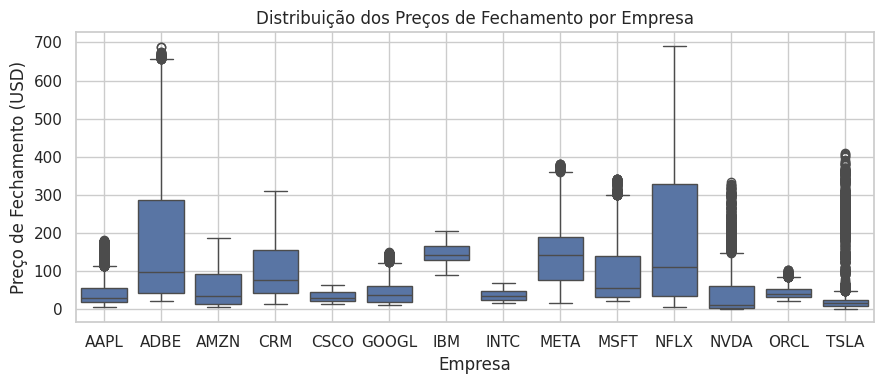

In [65]:
# 1. Gráfico de Boxplot: Volatilidade (variação de preços) por empresa

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))
sns.boxplot(data=df_rr, x='stock_symbol', y='close', order=sorted(df_rr['stock_symbol'].unique()))
plt.title('Distribuição dos Preços de Fechamento por Empresa')
plt.ylabel('Preço de Fechamento (USD)')
plt.xlabel('Empresa')
plt.grid(True)
plt.tight_layout()
plt.show()


---

## Tendências com médias móveis

As médias móveis de 5 e 20 dias ajudaram a visualizar:

Inícios e fim de tendências

Sinais de entrada e saída

**Conclusão**: O cruzamento da MM5 com a MM20 permite prever mudanças de tendência. Ideal para montar estratégias de entrada e saída.”

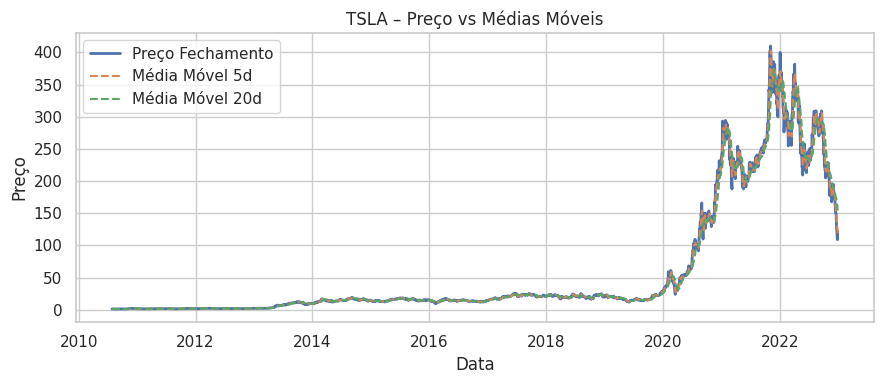

In [66]:
#Gráfico de Linha: close vs media_movel_5d e media_movel_20d

import matplotlib.pyplot as plt

empresa_exemplo = 'TSLA'  # troque por AAPL, NFLX, etc.
df_empresa = df_rr[df_rr['stock_symbol'] == empresa_exemplo].copy()

# Calculate moving averages
df_empresa['media_movel_5d'] = df_empresa['close'].rolling(window=5).mean()
df_empresa['media_movel_20d'] = df_empresa['close'].rolling(window=20).mean()

# Drop rows with NaN values resulting from rolling window calculation
df_empresa.dropna(inplace=True)

plt.figure(figsize=(9,4))
plt.plot(df_empresa['date'], df_empresa['close'], label='Preço Fechamento', linewidth=2)
plt.plot(df_empresa['date'], df_empresa['media_movel_5d'], label='Média Móvel 5d', linestyle='--')
plt.plot(df_empresa['date'], df_empresa['media_movel_20d'], label='Média Móvel 20d', linestyle='--')
plt.title(f'{empresa_exemplo} – Preço vs Médias Móveis')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

## Volume não influencia volatilidade

**Evidência:**

- Teste t entre grupos de alto e baixo volume → valor-p = 0.45 (não significativo)

- Média do desvio padrão foi maior no grupo de baixo volume, contrariando a suposição inicial

**Conclusão apoiada**: Embora se espere que ações mais negociadas sejam mais voláteis, a análise mostra que o grupo de baixo volume teve maior oscilação média de preços. O teste t confirmou ausência de diferença estatística (p = 0.45).

/tmp/ipython-input-67-1864988214.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grupo_volume', y='close', data=desvio_por_grupo, palette='pastel')


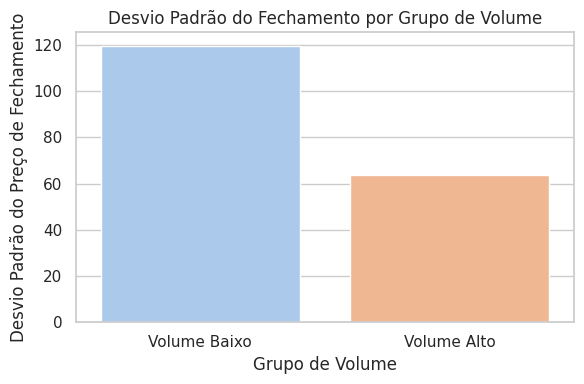

In [67]:
# Classificar grupo de volume
df_rr['grupo_volume'] = df_rr['volume'] >= df_rr['volume'].median()

# Calcular desvio padrão por grupo
desvio_por_grupo = df_rr.groupby('grupo_volume')['close'].std().reset_index()
desvio_por_grupo['grupo_volume'] = desvio_por_grupo['grupo_volume'].map({True: 'Volume Alto', False: 'Volume Baixo'})

# Gráfico
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x='grupo_volume', y='close', data=desvio_por_grupo, palette='pastel')
plt.title('Desvio Padrão do Fechamento por Grupo de Volume')
plt.xlabel('Grupo de Volume')
plt.ylabel('Desvio Padrão do Preço de Fechamento')
plt.tight_layout()
plt.show()


---

## Risco relativo por empresa

Utilizando a proporção de dias com alta ≥ 5%, calculamos o risco relativo em relação à empresa mais conservadora (GOOGL).  
A TSLA, por exemplo, apresentou um risco relativo de 33x, evidenciando um perfil altamente volátil.

> **Risco Relativo (TSLA / GOOGL): 33x**

/tmp/ipython-input-68-1045932033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_rr, x='Empresa', y='Risco Relativo', palette='rocket')


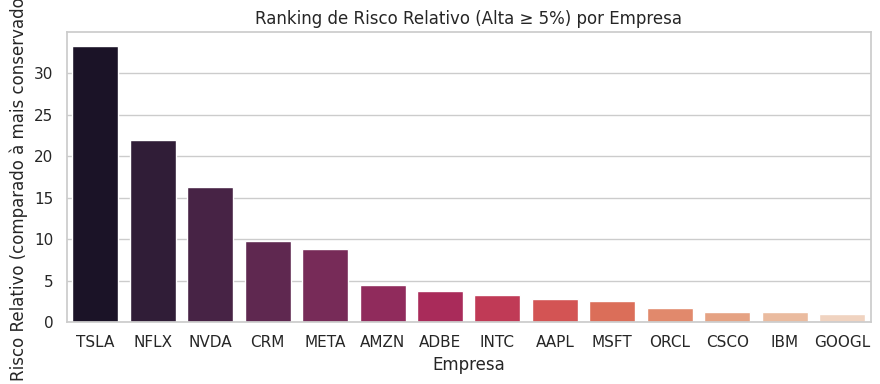

In [68]:
# Gerar gráfico de barras
plt.figure(figsize=(9, 4))
sns.barplot(data=ranking_rr, x='Empresa', y='Risco Relativo', palette='rocket')
plt.title('Ranking de Risco Relativo (Alta ≥ 5%) por Empresa')
plt.ylabel('Risco Relativo (comparado à mais conservadora)')
plt.xlabel('Empresa')
plt.tight_layout()
plt.show()

---

## Volume não prevê se a ação vai subir

**Evidência:**

Regressão logística teve acurácia de 49% e F1-score ≈ 0 para prever subiu = True

Regressão linear entre volume e fechamento teve R² = 0.05

**Conclusão apoiada:** Mesmo com grandes volumes de negociação, o modelo falha em prever se o preço subirá no dia. A regressão logística mostra F1-score ≈ 0 e a linear mostra R² = 0.05, o que indica que o volume isolado não serve como variável preditiva.

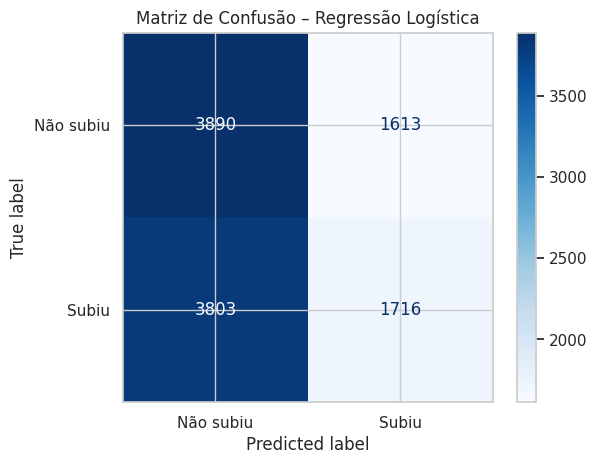

In [69]:
## Regressão Logística – Matriz de Confusão

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train are already defined
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# y_true: valores reais
# y_pred: previsões do modelo
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não subiu", "Subiu"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão – Regressão Logística")
plt.show()

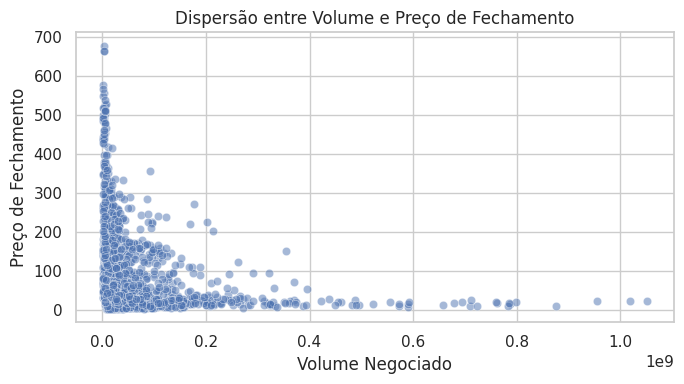

In [70]:
## Regressão Linear – Dispersão Volume x Preço

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.scatterplot(data=df_rr.sample(2000), x='volume', y='close', alpha=0.5)
plt.title('Dispersão entre Volume e Preço de Fechamento')
plt.xlabel('Volume Negociado')
plt.ylabel('Preço de Fechamento')
plt.grid(True)
plt.tight_layout()
plt.show()


---

## Resumo visual das recomendações finais

Perfil	Empresas	Estratégia Recomendada


🟢 Conservador	GOOGL, IBM, ORCL	Estabilidade e baixo risco

🟡 Moderado	AAPL, MSFT, AMZN	Uso de médias móveis para seguir tendência

🔴 Agressivo	TSLA, META, NFLX	Ações com maior oscilação, usar risco relativo

---

## Conclusões integradas

- Volume sozinho não é preditor.

- Médias móveis são eficazes para detectar tendência.

- Risco relativo permite comparação prática entre ações.

- Segmentação por perfil é estratégica para recomendações.